In [2]:
%cd ..

/Users/mateoibarguen/Desktop/CSC 482/complementary_fact_finder


In [17]:
import pickle
import re
import json
from src.topic_models import *
import pandas as pd
import matplotlib.pyplot as plt

### Steps:
- Reload wikipedia corpus such that it outputs:
    - Article title: First paragraph.
- Save tokens.
- Retrain so that it finds the most informative articles. 
- Score the sentences within each article. 
- provide the most informative sentence. 

In [4]:
lda_wiki = LdaWikiModel(student_tokens_path='data/student_keywords.json', wiki_tokens_path='data/articles_keywords.pkl', wiki_sents_path='data/articles.pkl')

In [5]:
student_corpus = [lda_wiki.wiki_dict.doc2bow(s) for s in lda_wiki.student_tokens]

In [17]:
lda_wiki.lda[student_corpus]

In [25]:
def compute_perplexity(lda_model):
    return np.exp(lda_n.log_perplexity(student_corpus) / len(student_corpus))

In [32]:
lda_perplexity = []
n_topics = [2, 4, 6, 8, 10, 12, 14, 16]
for n in n_topics:
    lda_n = lda_wiki.compute_lda(n)
    lda_perplexity.append(compute_perplexity(lda_n))

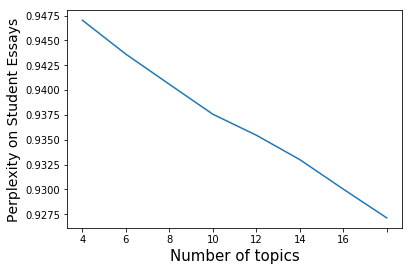

In [33]:
fig, ax = plt.subplots()
plt.plot(lda_perplexity)
ax.set_xticklabels(n_topics)
plt.xlabel('Number of topics', fontsize=15)
plt.ylabel('Perplexity on Student Essays', fontsize=14)
plt.show()

In [37]:
import pandas as pd

In [39]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors


# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_wiki.lda[student_corpus]):
    topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 112 samples in 0.000s...
[t-SNE] Computed neighbors for 112 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 112 / 112
[t-SNE] Mean sigma: 0.265145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.921818
[t-SNE] KL divergence after 1000 iterations: 0.219449


Loading BokehJS ...

In [18]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_wiki.lda, corpus=student_corpus, texts=lda_wiki.student_tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,11.0,0.3557,"state, game, people, south, team, compete, dis...","[gold, rush, introduction, beginning, year, li..."
1,1,6.0,0.6700,"noting, alphabet, people, awarded, park, medal...","[kitten, know, kitten, see, week, kitten, pet,..."
2,2,4.0,0.4062,"mar, parish, called, part, fahrenheit, rock, j...","[guide, rock, mineral, type, mineral, rock, mi..."
3,3,5.0,0.3089,"food, people, called, charlie, soap, world, ro...","[introduction, aloha, treat, today, know, goin..."
4,4,5.0,0.2556,"food, people, called, charlie, soap, world, ro...","[gray, wolf, know, wolf, ’, sense, smell, time..."
5,5,6.0,0.5430,"noting, alphabet, people, awarded, park, medal...","[fortnite, john, andrei, table, content, dance..."
6,6,12.0,0.2202,"storm, hurricane, august, match, typhoon, play...","[wolf, gray, wolf, live, travel, hunt, pack, d..."
7,7,8.0,0.3386,"people, korea, called, village, kansa, south, ...","[baby, alwas, cry, get, sceard, see, something..."
8,8,10.0,0.2414,"death, name, known, list, following, game, ord...","[roller, hockey, today, ’, adventure, learn, r..."
9,9,9.0,0.6238,"movie, language, program, people, book, united...","[gaming, setup, james, table, content, gaming,..."


In [66]:
topics = lda_wiki.lda.show_topics(formatted=True)

In [67]:
topics

[(19,
  '0.018*"food" + 0.010*"museum" + 0.009*"people" + 0.008*"poem" + 0.008*"plant" + 0.008*"mary" + 0.007*"make" + 0.006*"world" + 0.006*"year" + 0.006*"called"'),
 (17,
  '0.025*"album" + 0.012*"east" + 0.012*"island" + 0.011*"released" + 0.010*"russia" + 0.010*"far" + 0.009*"song" + 0.008*"district" + 0.008*"year" + 0.008*"chart"'),
 (12,
  '0.071*"belize" + 0.023*"grassland" + 0.013*"climate" + 0.011*"forest" + 0.010*"epstein" + 0.009*"belizean" + 0.009*"temperature" + 0.008*"people" + 0.007*"year" + 0.006*"sex"'),
 (6,
  '0.019*"awarded" + 0.018*"prize" + 0.014*"people" + 0.012*"movie" + 0.011*"curling" + 0.009*"film" + 0.009*"made" + 0.009*"medal" + 0.008*"contribution" + 0.006*"album"'),
 (1,
  '0.010*"belizean" + 0.009*"heart" + 0.009*"american" + 0.008*"movie" + 0.006*"pneumonia" + 0.005*"january" + 0.004*"remake" + 0.004*"star" + 0.004*"battle" + 0.004*"portrayed"'),
 (14,
  '0.023*"lutheran" + 0.023*"linguistics" + 0.013*"work" + 0.012*"research" + 0.010*"prison" + 0.010*

In [9]:
topics = lda_wiki.lda.show_topics(formatted=False)
len(topics)

10

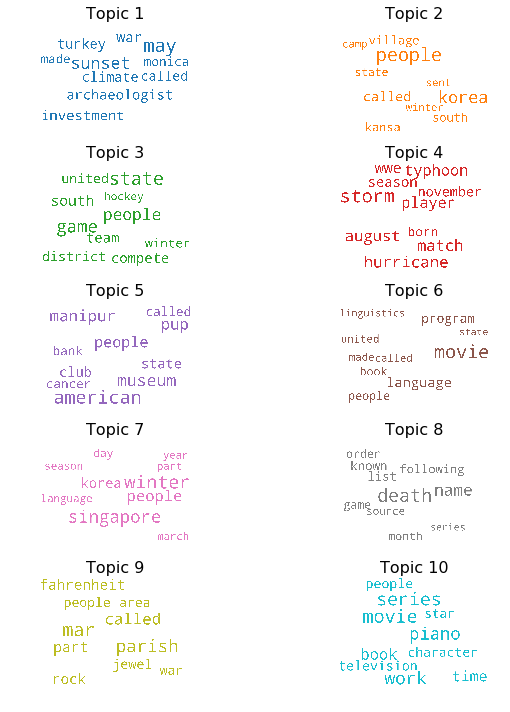

In [19]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_wiki.lda.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [20]:
import seaborn as sns

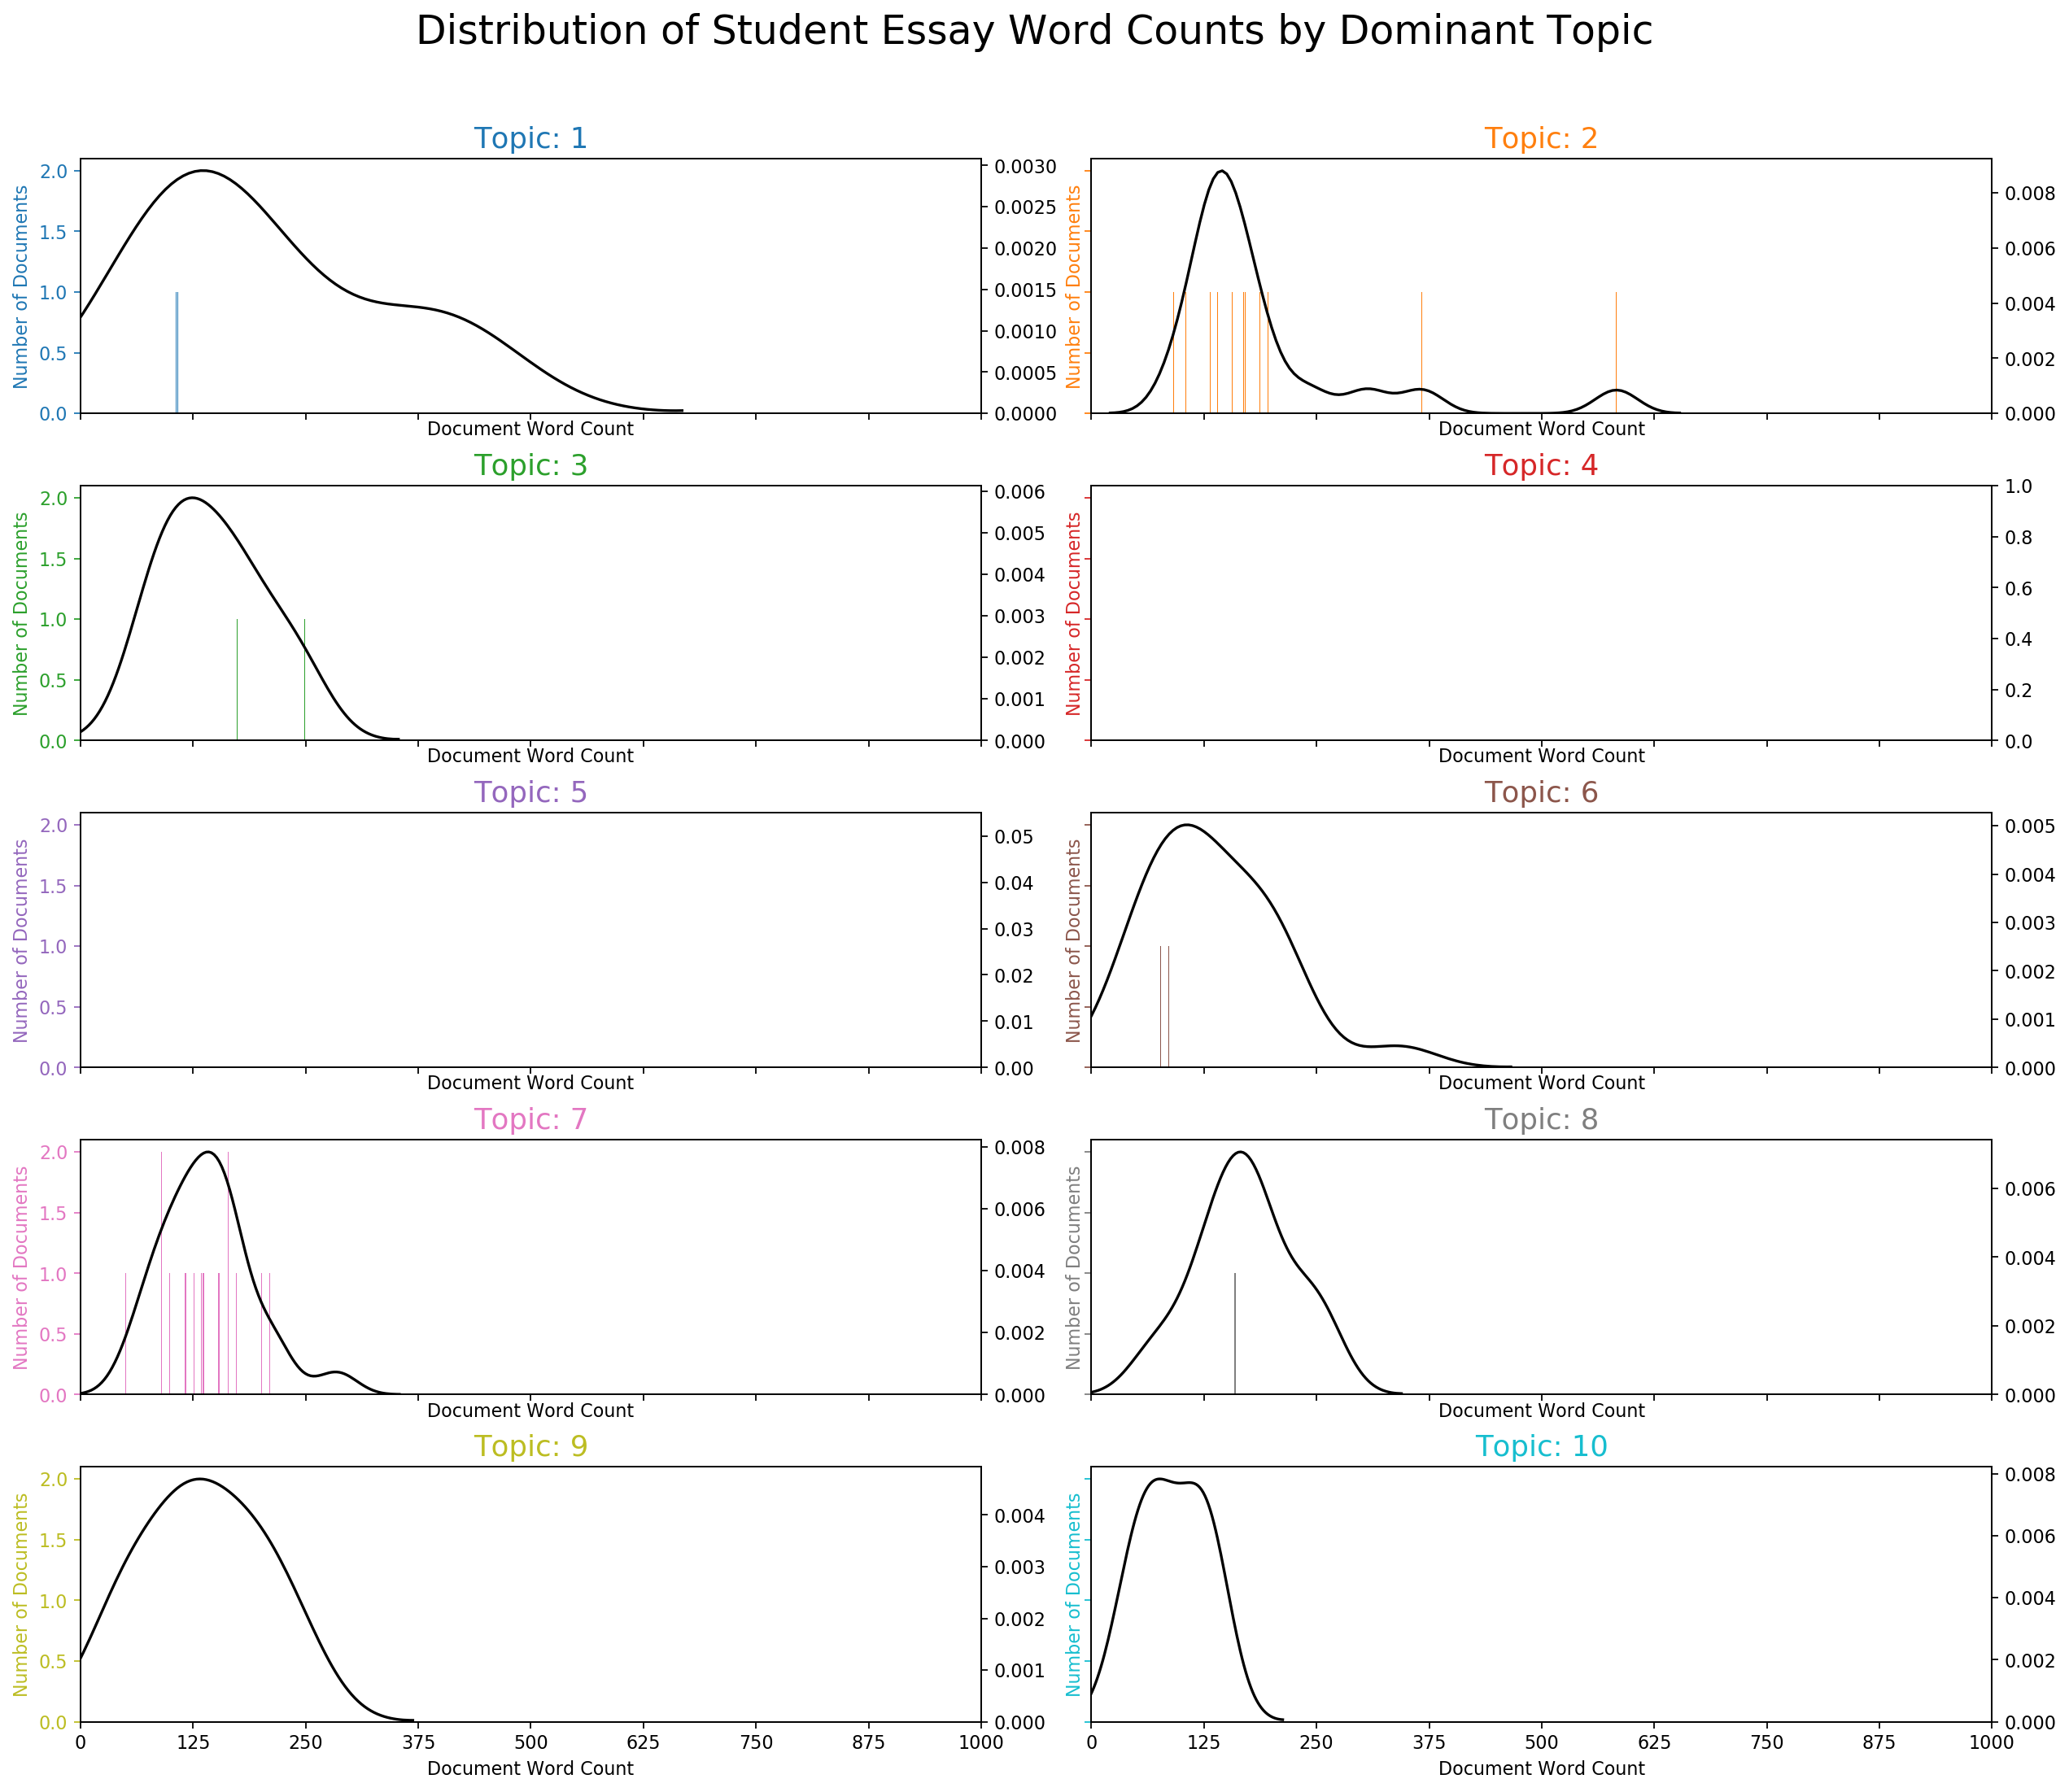

In [23]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i+1), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Student Essay Word Counts by Dominant Topic', fontsize=22)
plt.show()